# Linear Regression

---
Linear regression is a predictive supervised learning algorithm that is applied to real-valued target functions in order to predict a range of possible outputs for a given input. An important aspect of this algorithm is that it assumes that there is a linear relationship between the features (input data) and the targets (output of the function). This means that unlike many other machine learning algorithms, linear regression has a closed form solution meaning it can be expressed as an equation. This equation can be written as the following: 

$$y_i = w_1x_i+w_2$$

$$\begin{bmatrix} x_1 & 1\\ x_2 & 1 \\ x_3 & 1 \\ . & . \\ . & . \\ x_n & 1 \end{bmatrix}  \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}=\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ . \\ . \\ y_n \end{bmatrix}$$

This equation can also be represented by $$Xw = y$$

When this model is applied to real data, we will usually not be able to get a perfect solution. The best we can typically hope for is an approximation which can be written: 

$$X\hat w \approx y$$

Since our X matrix is not invertible, this equation cannot be solved as currently written. So we will need to multiply both sides by $X^T$ and perform some linear algebra on the equation to get it to a solvable state. After some linear algebra we will end up with: $$\hat w = (X^TX)^{-1}X^Ty$$

Once we solve for $\hat w$, we will then be able to predict the output for any new data using our calculated $\hat w$ values with the following equation: 

$$\hat y \approx (\hat w_1 * x_1) + \hat w_2$$

---

In [2]:
using CSV
using Random
using Plots

In [3]:
# Read in data and eliminate columns that are not useful
raw_data = CSV.read("insurance.csv")
data = raw_data[:,[1,2,3,4,5,7]]
println("Raw Data:")
println(data[1:5,:])

# Convert smoker column; yes=1 and no=0
data.smoker = [data.smoker[i] == "yes" ? 1 : 0 for i=1:length(data.smoker)]
# Convert sex column; female=1 and male=0
data.sex = [data.sex[i] == "female" ? 1 : 0 for i=1:length(data.sex)]
println("\nWorking Data:")
println(data[1:5,:])

Raw Data:
5×6 DataFrame
│ Row │ age   │ sex    │ bmi     │ children │ smoker │ charges │
│     │ Int64 │ String │ Float64 │ Int64    │ String │ Float64 │
├─────┼───────┼────────┼─────────┼──────────┼────────┼─────────┤
│ 1   │ 19    │ female │ 27.9    │ 0        │ yes    │ 16884.9 │
│ 2   │ 18    │ male   │ 33.77   │ 1        │ no     │ 1725.55 │
│ 3   │ 28    │ male   │ 33.0    │ 3        │ no     │ 4449.46 │
│ 4   │ 33    │ male   │ 22.705  │ 0        │ no     │ 21984.5 │
│ 5   │ 32    │ male   │ 28.88   │ 0        │ no     │ 3866.86 │

Working Data:
5×6 DataFrame
│ Row │ age   │ sex   │ bmi     │ children │ smoker │ charges │
│     │ Int64 │ Int64 │ Float64 │ Int64    │ Int64  │ Float64 │
├─────┼───────┼───────┼─────────┼──────────┼────────┼─────────┤
│ 1   │ 19    │ 1     │ 27.9    │ 0        │ 1      │ 16884.9 │
│ 2   │ 18    │ 0     │ 33.77   │ 1        │ 0      │ 1725.55 │
│ 3   │ 28    │ 0     │ 33.0    │ 3        │ 0      │ 4449.46 │
│ 4   │ 33    │ 0     │ 22.705  │ 0        

---
From this point we can approximate the linear relationship between *charges* (the cost of health insurance) and any of the other variables. For this implementation we will be focusing on the relationship between *charges* and *age*.

In order to test the accuracy of our model after we calculate our $\hat w$ we will want to have some data set aside that was not part of the data used to calculate $\hat w$, so we will subdivide the data into *testing* and *training* data. The *training* data will be used to construct our model and the *test* data will be used to gauge model adequacy afterwards.

---

In [4]:
# Subset data to data used in this analysis
lr_data = [x for x in zip(data.age, data.charges)]

# Subset about 90% of data to training data, remaining data to test_data
train_data = randsubseq(lr_data, .9)
train_x = [train_data[i][1] for i = 1:length(train_data)]
train_y = [train_data[i][2] for i = 1:length(train_data)]

test_data = [x for x in lr_data if x ∉ train_data];

Now that our testing and training data are set up, let's look at the training data to ensur there is a linear relationship between *age* and *charges*.

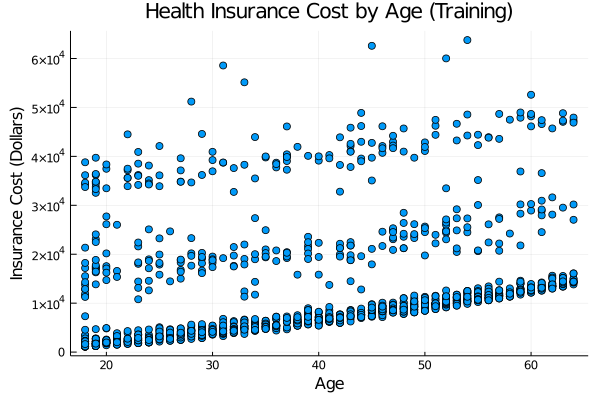

In [5]:
scatter(train_data,
        xaxis = "Age",
        yaxis = "Insurance Cost (Dollars)",
        title = "Health Insurance Cost by Age (Training)",
        legend = false)

---
Since there does appear to be a linear relationship between the data, we can begin coding the regression functions. Remember the function we want to set up and solve is $\hat w$ values using $\hat w = (X^TX)^{-1}X^Ty$. The first step to getting this set up is to create our matrix, *X*, which look like this: 

$$\begin{bmatrix} x_1 & 1\\ x_2 & 1 \\ x_3 & 1 \\ . & . \\ . & . \\ x_n & 1 \end{bmatrix}$$

The first column of this matrix consists of our feature data, which in this case is the vector of ages we just set up. The second column consists entirely of 1s so when it is multiplied by the weight vector it does not affect $w_2$.

---

In [6]:
X = ones(length(train_x),2)
X[:,1] = train_x;

---
Now that our X matrix is set up, we can now solve for $\hat w$ using our closed form equation.

---

In [7]:
ŵ = (X'*X)\(X'*train_y)

2-element Array{Float64,1}:
  239.84302775417197
 3949.838311065

---
With these values for $\hat w$, we are now able to construct our linear regression model by using the original approximation equation, $\hat y \approx w_1x+w_2$ and filling in our calculated $\hat w$ values. This gives us the following equation to approximate health insurance costs by age: 

$$\hat y \approx 245.37x + 3645.66$$

---

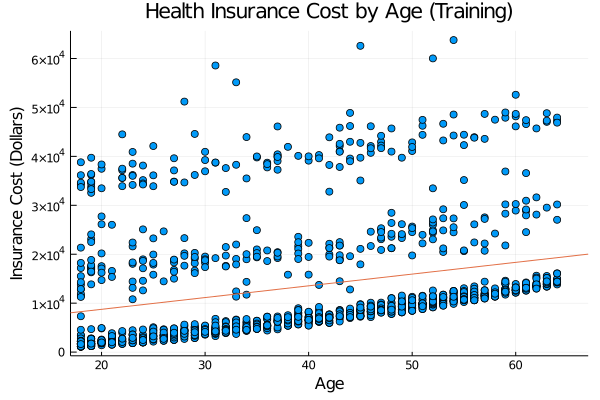

In [8]:
# Plot regression line onto the existing data plot
plot!(x -> ŵ[1]*x+ŵ[2],
        xlim = (17,67))

As demonstrated by the above plot, the approximate relationship we found does seem to represent the trend in our training data. However, not many of the training points are actually on the line. To get a more realistic picture of expected insurance costs, we can construct an interval using the errors to give us a window that we expect the cost to fall within. This will allow us to capture some of the effects of variables outside our calculations. There certainly exist outliers in our data caused by existing medical conditions that the majority of people looking for insurance won't possess. To avoid allowing these outliers to affect our prediction range too much, we will use 75% of the maximum error for the construction of our predictive range.

In [15]:
prediction(x) = ŵ[1]*x+ŵ[2]
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data];

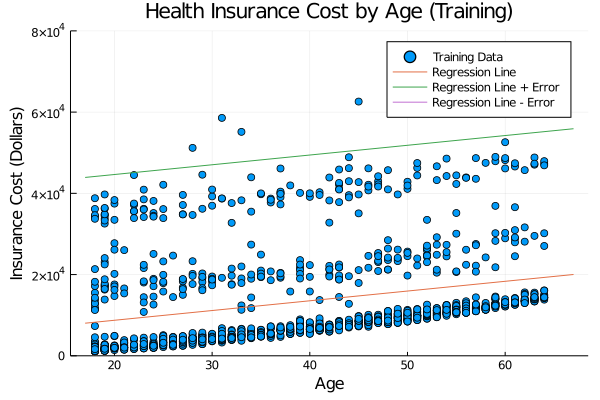

In [20]:
scatter(train_data,
        xaxis = "Age",
        yaxis = "Insurance Cost (Dollars)",
        title = "Health Insurance Cost by Age (Training)",
        ylim = (0,8*10^4),
        label = "Training Data")
plot!([(x,prediction(x)) for x in 17:67], label = "Regression Line")
plot!([(x,prediction(x)+.75*maximum(error_array)) for x in 17:67], label = "Regression Line + Error")
plot!([(x,prediction(x)-.75*maximum(error_array)) for x in 17:67], label = "Regression Line - Error")

A few things can be observed from our data when the prediction range is applied. Firstly, as expected there are only a few points above the predictive threshold we just set, so we can comfortably classify those as outliers. Second, the lower boundary of our predictive range exists entirely below 0. Since it is impossible to have a cost of less than 0 for insurance we can also safely disregard that boundary. Now that our range of costs has been established, let's apply it to the testing subset of data.

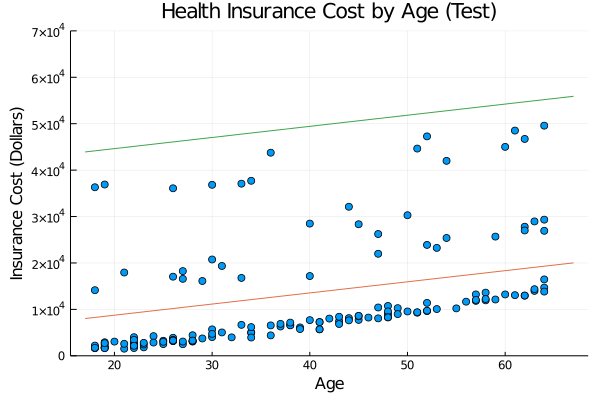

In [19]:
scatter(test_data,
        xaxis = "Age",
        yaxis = "Insurance Cost (Dollars)",
        title = "Health Insurance Cost by Age (Test)",
        ylim = (0,7*10^4),
        label = "Test Data",
        legend = false)
plot!([(x,prediction(x)) for x in 17:67], label = "Regression Line")
plot!([(x,prediction(x)+.75*maximum(error_array)) for x in 17:67], label = "Regression Line + Error")
plot!([(x,prediction(x)-.75*maximum(error_array)) for x in 17:67], label = "Regression Line - Error")

Since all of the test data also falls within the prediction interval we established, we can be confident that our model is adequately approximating health insurance costs by age with the possible exception of future outlier data.